<center><u><H1>Seaborn-Datos Numéricos</H1></u></center>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Plotting univariate distributions:

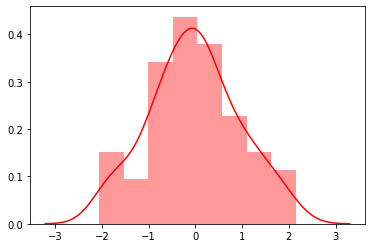

In [2]:
# displot function
x = np.random.normal(size=100)
sns.distplot(x, color='red')

## Histograms:

- A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. we also can plot a rug plot, which draws a small vertical tick at each observation.

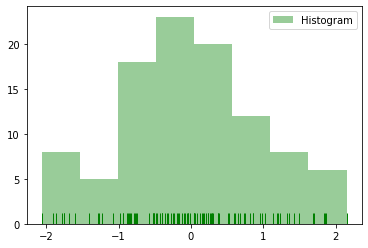

In [3]:
sns.distplot(x, kde=False, rug=True, color='green', label='Histogram')
plt.legend(loc='best')

### Kernel Density Estimation:

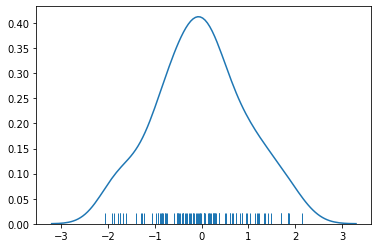

In [4]:
sns.distplot(x, hist=False, rug=True)

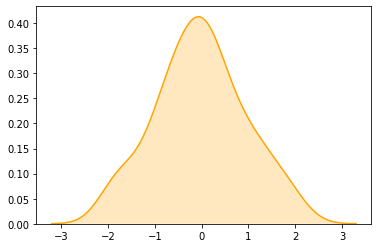

In [5]:
sns.kdeplot(x, color='orange',shade=True)

### Joint Plot:

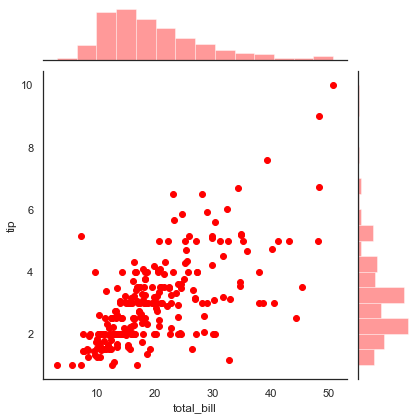

In [6]:
# Scatter plot
sns.set(style="white")
tips = sns.load_dataset("tips")
sns.jointplot(x="total_bill", y="tip", data=tips, color='red')

### Hexbin plots:
it shows the counts of observations that fall within hexagonal bins

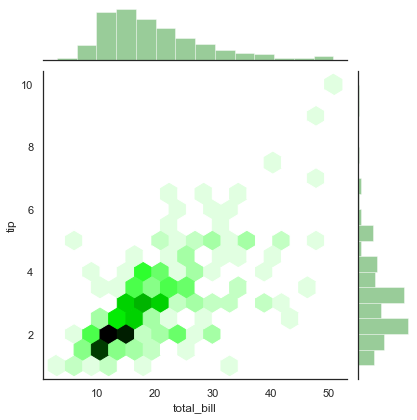

In [7]:
sns.jointplot("total_bill", "tip", data=tips, color='green', kind="hex")

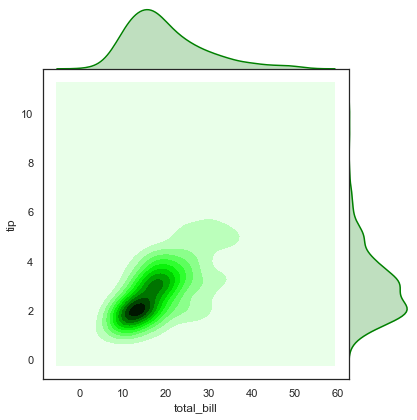

In [8]:
# kde plot 2D
sns.jointplot("total_bill", "tip", data=tips, kind="kde", space=0, color="green")

In [9]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


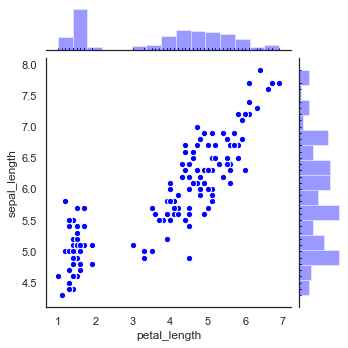

In [10]:
# Scatter plot
sns.jointplot("petal_length", "sepal_length", data=iris,
                  marginal_kws=dict(bins=15, rug=True),
                  s=40, color='blue', edgecolor="w", linewidth=1,
                 height=5, ratio=5)

#### Fit Linear Regression to data:

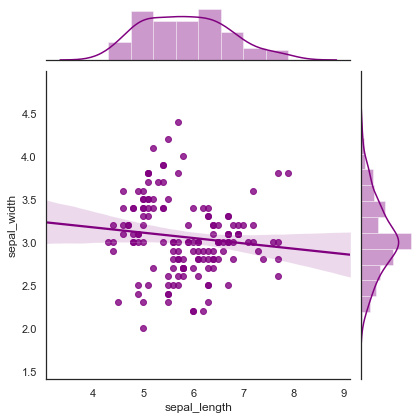

In [11]:
sns.jointplot("sepal_length", "sepal_width", data=iris,color='purple', kind="reg", height=6)

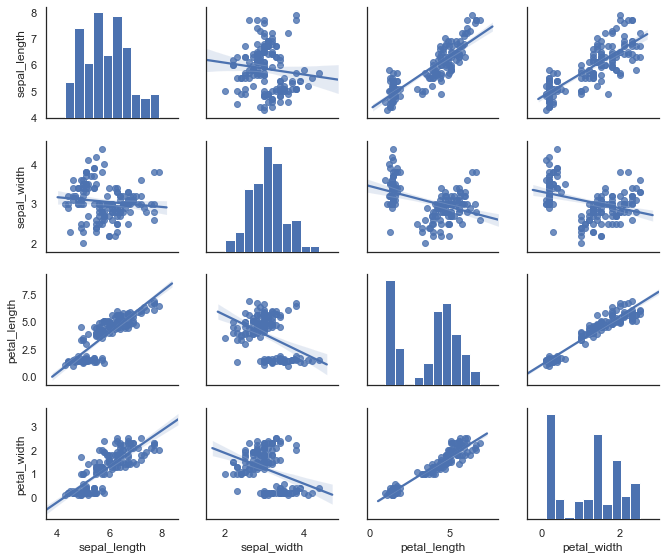

In [12]:
# linear regression by multiple pair variables
sns.pairplot(iris, kind="reg", height=2, aspect=1.2)

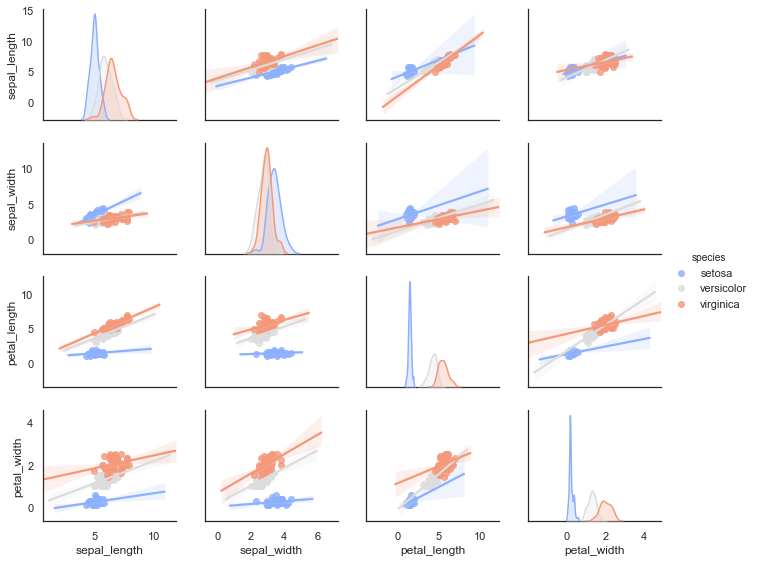

In [13]:
sns.pairplot(iris, kind="reg", hue="species", palette="coolwarm", height=2, aspect=1.2)

## Heat Map:

### Correlation matrix:

In [14]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


(4.0, 0.0)

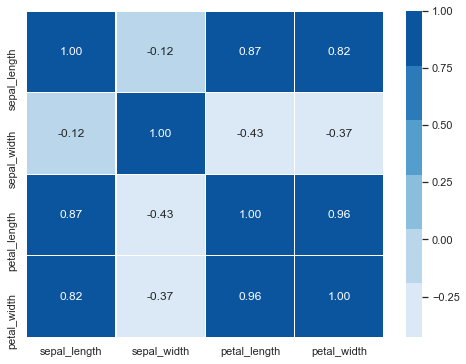

In [15]:
# if you dont need the colobar:cbar=False
plt.figure(figsize=(8,6))
ax = sns.heatmap(iris.corr(), annot=True, linecolor='white',linewidths=.3, fmt='.2f', cbar=True, cmap=(sns.color_palette("Blues")))
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Flights Dataset:

In [16]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [17]:
f = flights.pivot_table(index='month', columns='year', values='passengers')
f

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


## Cluster Map:

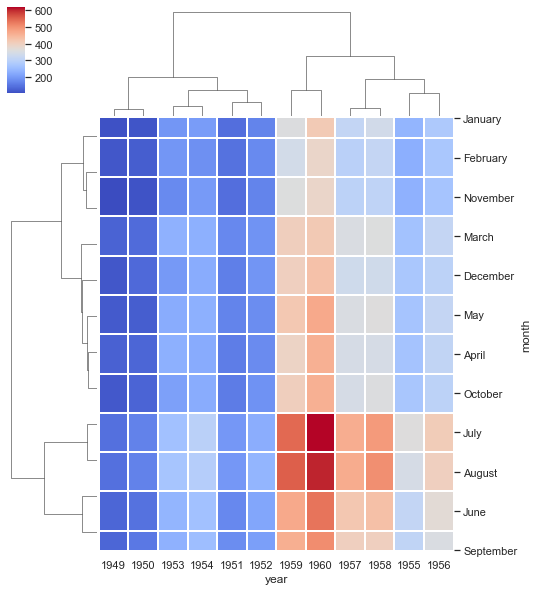

In [18]:
# dendogram: hierarchical relationship between objects
# The key to interpreting a dendrogram is to focus on the height
# at which any two objects are joined together.
sns.clustermap(f,figsize=(8, 10), cmap='coolwarm', linecolor='white', linewidths=1)

## Reference:

https://seaborn.pydata.org/